In [1]:
import pandas as pd
# import numpy as np

In [2]:
train_csv = pd.read_csv("Train/trainset.csv")
train_csv.head(5)

,Data,Label
0,600795.jpeg,10
1,627152.jpeg,10
2,119963.jpeg,10
3,118264.jpeg,10
4,199420.jpeg,10


In [3]:
train_csv['Data']

0       600795.jpeg
1       627152.jpeg
2       119963.jpeg
3       118264.jpeg
4       199420.jpeg
           ...     
9595    285044.jpeg
9596    383736.jpeg
9597    771886.jpeg
9598    298185.jpeg
9599    430460.jpeg
Name: Data, Length: 9600, dtype: object

In [4]:
train_csv.Label.unique()

array([10, 45,  3, 23, 37, 34, 16,  5, 36, 26, 47, 27,  6, 28, 22,  1, 31,
       43,  0, 35, 20, 33, 18, 39, 32, 21, 12, 42, 11, 29, 40, 24, 14,  8,
        7, 38, 46, 17, 30, 41, 44, 25,  2, 19, 13,  9, 15,  4])

In [6]:

from glob import glob 
from IPython.display import Image, display


In [7]:
train_image_list = glob('Train/trainset/*.jpeg')
train_sample_images = train_image_list[1:3]

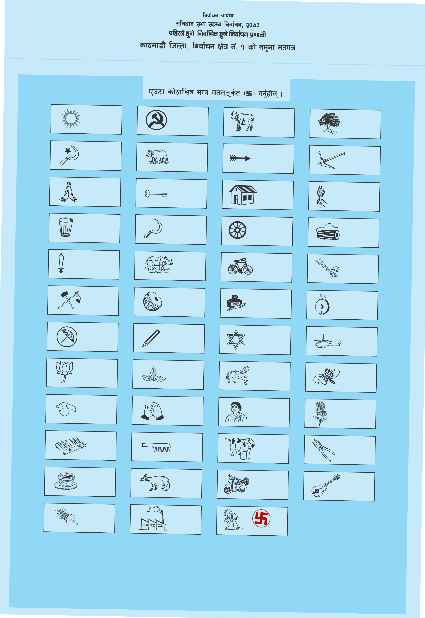

Train/trainset/202697.jpeg


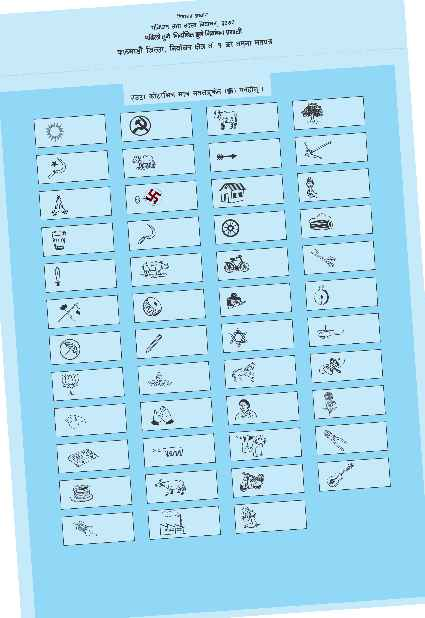

Train/trainset/709086.jpeg


In [8]:
for train_image in train_sample_images:
    display(Image(filename=train_image))
    print(train_image)

In [9]:
test_csv = pd.read_csv("Test/testset.csv")
test_csv.head(5)

,Data,Label
0,632755.jpeg,10
1,496855.jpeg,10
2,155390.jpeg,10
3,265013.jpeg,10
4,496360.jpeg,10


In [10]:
test_image_list = glob('Train/trainset/*.jpeg')
test_sample_images = test_image_list[1:3]

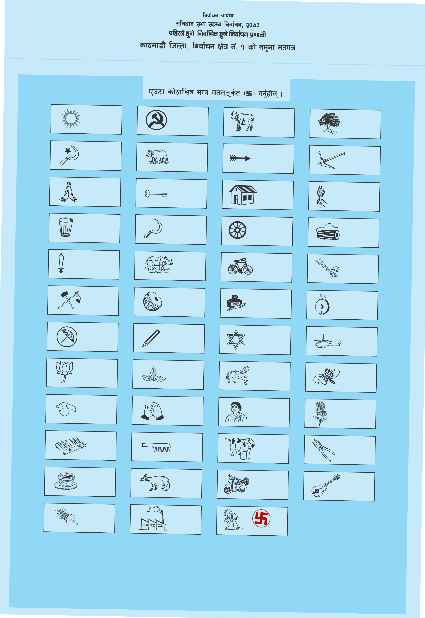

Train/trainset/202697.jpeg


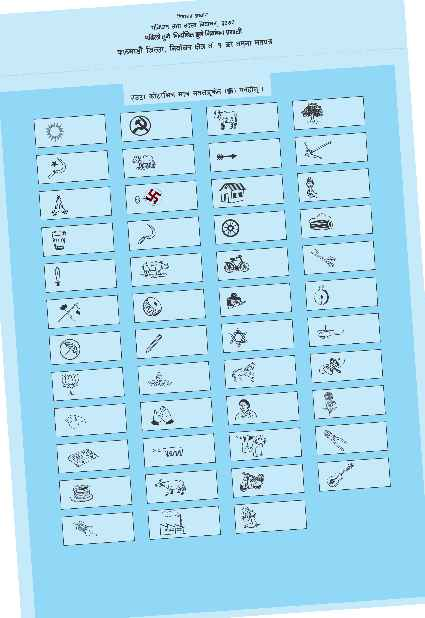

Train/trainset/709086.jpeg


In [11]:
for test_image in test_sample_images:
    display(Image(filename=test_image))
    print(test_image)

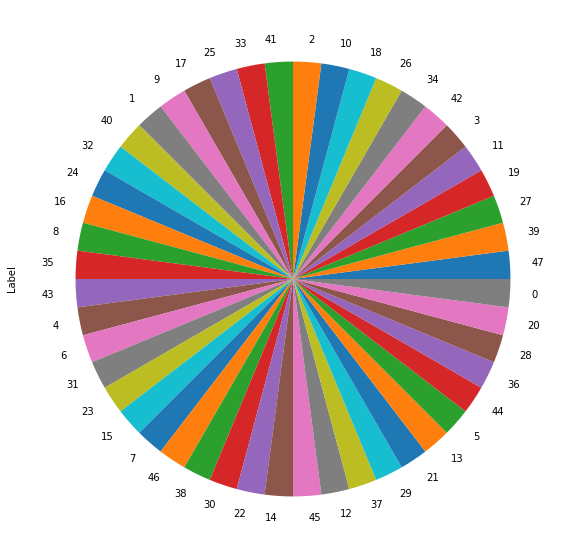

In [13]:
import matplotlib.pyplot as plt
train_csv['Label'].value_counts().plot(kind='pie', figsize=(10, 10))

In [14]:
train_csv.columns.values

array(['Data', 'Label'], dtype=object)

In [15]:
train_list = list(train_csv['Data'])
train_list

['600795.jpeg',
 '627152.jpeg',
 '119963.jpeg',
 '118264.jpeg',
 '199420.jpeg',
 '124109.jpeg',
 '700865.jpeg',
 '858526.jpeg',
 '777687.jpeg',
 '597496.jpeg',
 '395586.jpeg',
 '347080.jpeg',
 '346829.jpeg',
 '634674.jpeg',
 '695414.jpeg',
 '171053.jpeg',
 '370185.jpeg',
 '860433.jpeg',
 '937042.jpeg',
 '268265.jpeg',
 '167968.jpeg',
 '337538.jpeg',
 '453468.jpeg',
 '987614.jpeg',
 '643973.jpeg',
 '341837.jpeg',
 '406896.jpeg',
 '716014.jpeg',
 '756012.jpeg',
 '612074.jpeg',
 '693468.jpeg',
 '377360.jpeg',
 '471543.jpeg',
 '857476.jpeg',
 '263884.jpeg',
 '514628.jpeg',
 '310756.jpeg',
 '454785.jpeg',
 '179367.jpeg',
 '659340.jpeg',
 '859286.jpeg',
 '451879.jpeg',
 '567550.jpeg',
 '352739.jpeg',
 '374698.jpeg',
 '752700.jpeg',
 '708825.jpeg',
 '580128.jpeg',
 '278573.jpeg',
 '680650.jpeg',
 '989169.jpeg',
 '926731.jpeg',
 '139794.jpeg',
 '423156.jpeg',
 '733112.jpeg',
 '767815.jpeg',
 '552078.jpeg',
 '743996.jpeg',
 '414043.jpeg',
 '408173.jpeg',
 '875472.jpeg',
 '977940.jpeg',
 '865207

In [24]:
print(train_csv.shape)
len(train_csv)

(9600, 2)


9600

In [25]:
import numpy as np
num_train_samples = len(train_csv)
num_test_samples = len(test_csv)
train_batch_size = 32
test_batch_size = 16


train_steps = np.ceil(num_train_samples / train_batch_size)
test_steps = np.ceil(num_test_samples / test_batch_size)

In [28]:
# test_steps
# train_step

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.5

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (96,96, 3)))
model.add(Conv2D(first_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(second_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(third_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(48, activation = "softmax"))

In [30]:
model.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
             )

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        9216      
_________________________________________________________________
batch_normalization (BatchNo (None, 92, 92, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 92, 92, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        1

In [ ]:
train_path = '/home/oem/Downloads/haha/train_dir'
valid_path = '/home/oem/Downloads/haha/val_dir'


In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_acc', patience=2, verbose=1)
reducel = ReduceLROnPlateau(monitor='val_acc', patience=1, verbose=1, factor=0.1)
history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=17,
                   callbacks=[reducel, earlystopper, checkpoint])


NameError: name 'train_gen' is not defined

In [ ]:
for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'label']